<h1 >Preparation</h1>

In [2]:
# Load data
import pandas as pd
df = pd.read_csv('./data/data.csv', encoding='gb18030')

In [3]:
import jieba

In [4]:
def chinese_word_cut(mytext):
    return " ".join(jieba.cut(mytext))

In [5]:
df['cutted_comment'] = df.comment.apply(chinese_word_cut) # Word cutting

Building prefix dict from the default dictionary ...
Dumping model to file cache /var/folders/1d/q14zm7gx0r5dnfcsrls8r0s40000gq/T/jieba.cache
Loading model cost 2.562 seconds.
Prefix dict has been built succesfully.


In [6]:
# Transform the result of cutting from stirng to list
# which is convient for getting word frequency
df['cutted_comment_list'] = df.cutted_comment.apply(lambda string: string.split()) 
df.head(5)

,comment,star,cutted_comment,cutted_comment_list
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,2,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,"[口味, ：, 不, 知道, 是, 我口, 高, 了, ，, 还是, 这家, 真, 不怎么样..."
1,菜品丰富质量好，服务也不错！很喜欢！,4,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,"[菜品, 丰富, 质量, 好, ，, 服务, 也, 不错, ！, 很, 喜欢, ！]"
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,"[说真的, ，, 不, 晓得, 有人, 排队, 的, 理由, ，, 香精, 香精, 香精, ..."
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,"[菜量, 实惠, ，, 上菜, 还, 算, 比较, 快, ，, 疙瘩汤, 喝出, 了, 秋日..."
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,"[先说, 我, 算是, 娜娜, 家风, 荷园, 开业, 就, 一直, 在, 这里, 吃, 每..."


In [7]:
# Stop words
def get_custom_stopwords(stop_words_file):
    with open(stop_words_file) as f:
        stopwords = f.read()
    stopwords_list = stopwords.split('\n')
    custom_stopwords_list = [i for i in stopwords_list]
    return custom_stopwords_list

In [8]:
stop_words_file = "./data/stopwordsHIT.txt"
# stop_words_file = "./data/Basic_stopwords.txt"
stopwords = get_custom_stopwords(stop_words_file)
stopwords[:5]

['\xa1\xaa\xa1\xaa\xa1\xaa\r',
 '\xa1\xb7\r',
 '\xa3\xac\r',
 '\xa1\xc2\xa3\xa8\xa3\xb1\xa3\xad\r',
 '\xa1\xb1\r']

In [9]:
import re
df['cutted_comment_new'] = df.cutted_comment.apply(lambda x: re.sub('[\。\，\：\！\？\《\》\【\】]','',x))
df.head()

,comment,star,cutted_comment,cutted_comment_list,cutted_comment_new
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,2,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,"[口味, ：, 不, 知道, 是, 我口, 高, 了, ，, 还是, 这家, 真, 不怎么样...",口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...
1,菜品丰富质量好，服务也不错！很喜欢！,4,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,"[菜品, 丰富, 质量, 好, ，, 服务, 也, 不错, ！, 很, 喜欢, ！]",菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,"[说真的, ，, 不, 晓得, 有人, 排队, 的, 理由, ，, 香精, 香精, 香精, ...",说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,"[菜量, 实惠, ，, 上菜, 还, 算, 比较, 快, ，, 疙瘩汤, 喝出, 了, 秋日...",菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,"[先说, 我, 算是, 娜娜, 家风, 荷园, 开业, 就, 一直, 在, 这里, 吃, 每...",先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...


In [10]:
data = df
data.cutted_comment = data.cutted_comment.apply(lambda x: re.sub('[\。\，\：\！\？\《\》\【\】]','',x))
data.head()

,comment,star,cutted_comment,cutted_comment_list,cutted_comment_new
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,2,口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...,"[口味, ：, 不, 知道, 是, 我口, 高, 了, ，, 还是, 这家, 真, 不怎么样...",口味 ： 不 知道 是 我口 高 了 ， 还是 这家 真 不怎么样 。 我 感觉 口味 ...
1,菜品丰富质量好，服务也不错！很喜欢！,4,菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！,"[菜品, 丰富, 质量, 好, ，, 服务, 也, 不错, ！, 很, 喜欢, ！]",菜品 丰富 质量 好 ， 服务 也 不错 ！ 很 喜欢 ！
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2,说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！,"[说真的, ，, 不, 晓得, 有人, 排队, 的, 理由, ，, 香精, 香精, 香精, ...",说真的 ， 不 晓得 有人 排队 的 理由 ， 香精 香精 香精 香精 ， 拜拜 ！
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5,菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...,"[菜量, 实惠, ，, 上菜, 还, 算, 比较, 快, ，, 疙瘩汤, 喝出, 了, 秋日...",菜量 实惠 ， 上菜 还 算 比较 快 ， 疙瘩汤 喝出 了 秋日 的 暖意 ， 烧茄子 吃...
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,"[先说, 我, 算是, 娜娜, 家风, 荷园, 开业, 就, 一直, 在, 这里, 吃, 每...",先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...


## Data Information

In [11]:
df.star.value_counts()
# There is no comments with star 3

5    500
4    500
2    500
1    500
Name: star, dtype: int64

In [12]:
def words_count(src, stopwords, flag = 0):
    words_count_dict = {}
    for rows in src:
        for text in rows:
            if text in stopwords: 
                continue
            if text in words_count_dict:
                words_count_dict[text] += 1
            else:
                words_count_dict[text] = 1
    if flag == 1:
        return words_count_dict # Dict form
    sort_dict = sorted(words_count_dict,key=lambda x:words_count_dict[x], reverse=True)
    return pd.DataFrame([[k,words_count_dict[k]] for k in sort_dict], columns = ['words', 'frequence']) # df form

In [13]:
df_words_count = words_count(df.cutted_comment_list, stopwords)
df_words_count_dict = words_count(df.cutted_comment_list, stopwords, 1)
df_words_count.head(10)

/Users/chenzhe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


,words,frequence
0,，,10782
1,的,5298
2,了,3687
3,。,3072
4,！,1488
5,是,1475
6,吃,1263
7,很,1251
8,也,1190
9,都,1131


In [14]:
df_count_once = [x for x in df_words_count_dict if df_words_count_dict[x] == 1]
df_count_twice = [x for x in df_words_count_dict if df_words_count_dict[x] <= 2]
df_count_10 = [x for x in df_words_count_dict if df_words_count_dict[x] <= 10]
df_count_15 = [x for x in df_words_count_dict if df_words_count_dict[x] <= 15]
df_count_20 = [x for x in df_words_count_dict if df_words_count_dict[x] <= 20]
len(df_count_once)

5200

In [15]:
df_count_g_100 = [x for x in df_words_count_dict if df_words_count_dict[x] >= 100]
df_count_g_80 = [x for x in df_words_count_dict if df_words_count_dict[x] >= 80]
df_count_g_50 = [x for x in df_words_count_dict if df_words_count_dict[x] >= 50]


In [16]:
# Words frequence of comments of various star
df_star5_count = words_count(df[df.star == 5].cutted_comment_list, stopwords)
df_star4_count = words_count(df[df.star == 4].cutted_comment_list, stopwords)
df_star2_count = words_count(df[df.star == 2].cutted_comment_list, stopwords)
df_star1_count = words_count(df[df.star == 1].cutted_comment_list, stopwords)
print('Top 10 words out of total %d appear most in comments with star 5'%df_star5_count.shape[0])
print(df_star5_count.head(10))
print('Top 10 words out of total %d appear most in comments with star 4'%df_star4_count.shape[0])
print(df_star4_count.head(10))
print('Top 10 words out of total %d appear most in comments with star 2'%df_star2_count.shape[0])
print(df_star2_count.head(10))
print('Top 10 words out of total %d appear most in comments with star 1'%df_star1_count.shape[0])
print(df_star1_count.head(10))

/Users/chenzhe/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:5: UnicodeWarning: Unicode equal comparison failed to convert both arguments to Unicode - interpreting them as being unequal
  """


Top 10 words out of total 3323 appear most in comments with star 5
  words  frequence
0     ，       2250
1     的       1068
2     了        576
3     。        536
4     很        443
5    不错        316
6     也        279
7     吃        269
8     是        254
9     好        246
Top 10 words out of total 4180 appear most in comments with star 4
  words  frequence
0     ，       2804
1     的       1336
2     。        819
3     了        766
4     很        366
5     吃        347
6    味道        317
7    不错        316
8     是        315
9     也        300
Top 10 words out of total 4461 appear most in comments with star 2
  words  frequence
0     ，       2843
1     的       1441
2     了       1109
3     。        937
4     是        467
5     ！        415
6     不        377
7     都        341
8     吃        334
9     也        304
Top 10 words out of total 4822 appear most in comments with star 1
  words  frequence
0     ，       2885
1     的       1453
2     了       1236
3     。        780
4     ！   

In [17]:
# Words appears in both star4 comments and star5 comments
sim_45 = [x for x in df_star5_count.words[:50].values if x in df_star4_count.words[:50].values]
# Words appears in both star1 comments and star2 comments
sim_12 = [x for x in df_star1_count.words[:50].values if x in df_star2_count.words[:50].values]

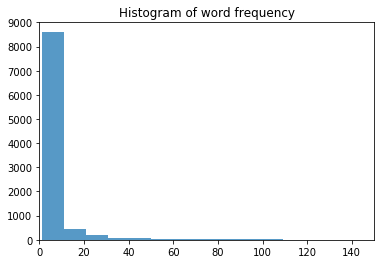

In [18]:
# Histogram of the word frequence
import matplotlib.pyplot as plt
plt.hist(df_words_count[df_words_count.frequence < 400].frequence.values, 40, alpha = 0.75)
plt.axis([0, 150, 0, 9000])
plt.title('Histogram of word frequency')
plt.show()

 ### Word Cloud

Star 5 word cloud:


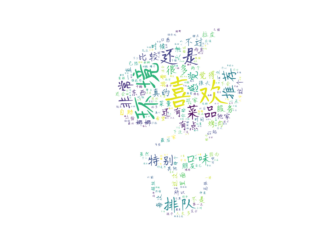

Star 4 word cloud:


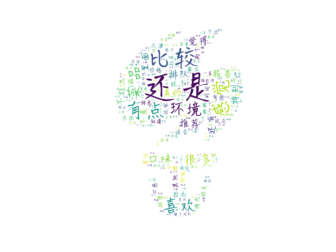

Star 2 word cloud:


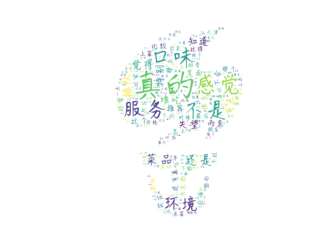

Star 1 word cloud:


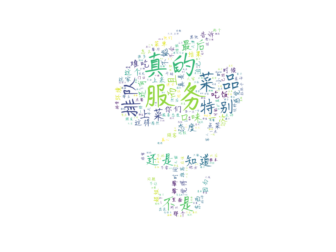

In [21]:
data_cutted = pd.DataFrame({
    'Comment': df['cutted_comment'],
    'Star': df['star']
})

from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

sw = set()
tempt = get_custom_stopwords("./data/stopwordsHIT_utf8.txt")


sw.update([u"好吃",u"了",u"是",u"吃",u"很",u"也",u"都",u"就",u"还",u"我",u"去",u"菜",u"有",u"说",u"人",u"点",u"和",u"我们",u"就是",u"不",u"味道",u"可以",u"多",u"来",u"没",u"在",u"吧",u"服务员",u"一个",u"没有",u"不错",u"一般",u"上",u"这",u"太",u"你",u"再",u"给",u"等",u"到",u"要",u"什么",u"好",u"号",u"啊",u"这么",u"但是"])

logo = np.array(Image.open("./data/logo.png"))
# image_colors = ImageColorGenerator(logo)


wc = WordCloud(
    background_color = "white", 
    font_path='./input/ziti.ttf', 
    mask = logo, 
    stopwords = sw)

for i in [5,4,2,1]:
    print('Star '+str(i)+' word cloud:')
    wc.generate(''.join(data_cutted['Comment'][data_cutted['Star'] == i]))
    plt.imshow(wc, interpolation = "bilinear")
    plt.axis("off")
    plt.show()
    wc.to_file('star'+str(i)+'.png')

## Vectorization and directly classfication

In [18]:
from sklearn.cross_validation import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

C:\Users\Claude\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [19]:
new_stopwords = stopwords
# new_stopwords.extend(df_count_twice) 
new_stopwords.extend(df_count_10) # Adding the words who appear less than 10 times to stopwords
# new_stopwords.extend(df_count_g_100) # words who appear greater than 100 times

vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = new_stopwords, norm = 'l2', max_features = 2000)

x = df.cutted_comment
Y = df.star

train_x, test_x, train_y,  test_y = train_test_split(x, Y, test_size = 0.6, random_state = 40)

new_train_x = vectorizer.fit_transform(train_x.values)
new_test_x = vectorizer.transform(test_x.values)

In [20]:
import sklearn.naive_bayes
import sklearn.svm
from sklearn.ensemble import RandomForestClassifier
import sklearn.neighbors
import sklearn.naive_bayes
# Try various kinds of models


# moodel = sklearn.neighbors.KNeighborsClassifier(n_neighbors=10)
# model = RandomForestClassifier(n_estimators = 15)
# model = sklearn.svm.LinearSVC()

model = sklearn.naive_bayes.MultinomialNB()
model.fit(new_train_x, train_y.values)
predict_y = model.predict(new_test_x)
print(sklearn.metrics.classification_report(test_y.values, predict_y))
print("Number of mislabeled points out of a total %d points : %d" % (test_x.shape[0],(test_y != predict_y).sum()))

from sklearn.metrics import confusion_matrix
labels = [1,2,4,5]
conf_mat = confusion_matrix(test_y, predict_y, labels = labels) 
conf_mat

             precision    recall  f1-score   support

          1       0.59      0.59      0.59       301
          2       0.47      0.36      0.41       305
          4       0.39      0.64      0.48       285
          5       0.55      0.34      0.42       309

avg / total       0.50      0.48      0.47      1200

Number of mislabeled points out of a total 1200 points : 624


array([[179,  70,  42,  10],
       [ 97, 111,  77,  20],
       [ 16,  33, 181,  55],
       [ 13,  21, 170, 105]])

In [22]:
# Check model's performence on the training set
print(sklearn.metrics.classification_report(train_y,model.predict(new_train_x)))
print(confusion_matrix(train_y, model.predict(new_train_x), labels = [1,2,4,5]))

             precision    recall  f1-score   support

          1       0.88      0.92      0.90       199
          2       0.91      0.79      0.85       195
          4       0.79      0.92      0.85       215
          5       0.91      0.80      0.85       191

avg / total       0.87      0.86      0.86       800

[[184   6   6   3]
 [ 19 155  18   3]
 [  2   6 198   9]
 [  4   4  30 153]]


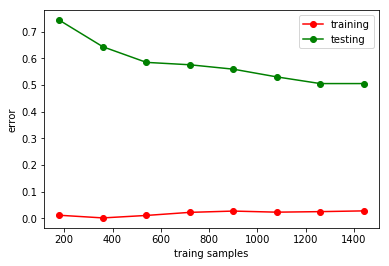

the best test_size: 0.8
Directly using naive bayes model, the maximal accuracy is about 0.4945


In [23]:
# Cross validation
from sklearn import model_selection
import matplotlib.pyplot as plt
import numpy as np


vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = new_stopwords)
X,Y = vectorizer.fit_transform(df.cutted_comment), df.star

model = sklearn.naive_bayes.MultinomialNB()

# model = sklearn.svm.SVC()
g_train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
train_sizes,train_score,test_score = model_selection.learning_curve(model, X, Y,train_sizes=g_train_sizes,cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)

plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')

plt.legend(loc='best')
plt.xlabel("traing samples")
plt.ylabel('error')
plt.show()
print("the best test_size: " + str(g_train_sizes[np.argmin(test_error)]))
print("Directly using naive bayes model, the maximal accuracy is about "+str(1-np.min(test_error)))

## Train model on data of different star respectly

In [24]:
df['good'] = pd.Series([(lambda x: 0 if x<3 else 1)(x) for x in df.star])

df.head()

,comment,star,cutted_comment,cutted_comment_list,cutted_comment_new,good
0,口味：不知道是我口高了，还是这家真不怎么样。 我感觉口味确实很一般很一般。上菜相当快，我敢说...,2,口味 不 知道 是 我口 高 了 还是 这家 真 不怎么样 我 感觉 口味 确实 ...,"[口味, ：, 不, 知道, 是, 我口, 高, 了, ，, 还是, 这家, 真, 不怎么样...",口味 不 知道 是 我口 高 了 还是 这家 真 不怎么样 我 感觉 口味 确实 ...,0
1,菜品丰富质量好，服务也不错！很喜欢！,4,菜品 丰富 质量 好 服务 也 不错 很 喜欢,"[菜品, 丰富, 质量, 好, ，, 服务, 也, 不错, ！, 很, 喜欢, ！]",菜品 丰富 质量 好 服务 也 不错 很 喜欢,1
2,说真的，不晓得有人排队的理由，香精香精香精香精，拜拜！,2,说真的 不 晓得 有人 排队 的 理由 香精 香精 香精 香精 拜拜,"[说真的, ，, 不, 晓得, 有人, 排队, 的, 理由, ，, 香精, 香精, 香精, ...",说真的 不 晓得 有人 排队 的 理由 香精 香精 香精 香精 拜拜,0
3,菜量实惠，上菜还算比较快，疙瘩汤喝出了秋日的暖意，烧茄子吃出了大阪烧的味道，想吃土豆片也是口...,5,菜量 实惠 上菜 还 算 比较 快 疙瘩汤 喝出 了 秋日 的 暖意 烧茄子 吃 出 ...,"[菜量, 实惠, ，, 上菜, 还, 算, 比较, 快, ，, 疙瘩汤, 喝出, 了, 秋日...",菜量 实惠 上菜 还 算 比较 快 疙瘩汤 喝出 了 秋日 的 暖意 烧茄子 吃 出 ...,1
4,先说我算是娜娜家风荷园开业就一直在这里吃 每次出去回来总想吃一回 有时觉得外面的西式简餐总是...,4,先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,"[先说, 我, 算是, 娜娜, 家风, 荷园, 开业, 就, 一直, 在, 这里, 吃, 每...",先说 我 算是 娜娜 家风 荷园 开业 就 一直 在 这里 吃 每次 出去 回来 总想 ...,1


### Classify the column 'good'

In [25]:
# Classify on the 'good' column

train_g_x, test_g_x, train_g_y,  test_g_y = train_test_split(df.cutted_comment, df.good, test_size = 0.2, random_state = 50)

new_stopwords = stopwords
new_stopwords.extend(df_count_10) 
# new_stopwords.extend(df_count_g_100)

vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = new_stopwords, lowercase = False, max_features=1500)

train_g_x = vectorizer.fit_transform(train_g_x.values)
test_g_x = vectorizer.transform(test_g_x.values)


# model = sklearn.svm.SVC() # F_{1avg}=0.33
# model = sklearn.svm.LinearSVC() # F_{1avg}=0.85
# model = sklearn.neighbors.KNeighborsClassifier() # F_{1avg}=0.75
model = sklearn.naive_bayes.MultinomialNB(1.9) # F_{1avg}=0.86
# model = sklearn.linear_model.LogisticRegression()#0.84
model.fit(train_g_x, train_g_y.values)
predict_g_y = model.predict(test_g_x)
print(sklearn.metrics.classification_report(test_g_y.values, predict_g_y, target_names=['1 or 2', '4 or 5']))
print("Number of mislabeled points out of a total %d points : %d" % (test_g_x.shape[0],(test_g_y != predict_g_y).sum()))

# Confusion matrix
labels = [0,1]
conf_mat = confusion_matrix(test_g_y, predict_g_y, labels = labels) 
conf_mat

             precision    recall  f1-score   support

     1 or 2       0.89      0.84      0.86       209
     4 or 5       0.83      0.89      0.86       191

avg / total       0.86      0.86      0.86       400

Number of mislabeled points out of a total 400 points : 55


array([[175,  34],
       [ 21, 170]])

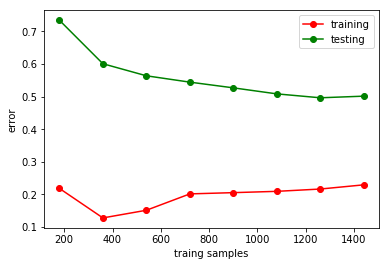

In [26]:
# Cross Validation
from sklearn import model_selection
import matplotlib.pyplot as plt
import numpy as np
import sklearn.svm
vectorizer = TfidfVectorizer(ngram_range=(1, 2), stop_words = new_stopwords, max_features=1500)
X,Y = vectorizer.fit_transform(df.cutted_comment), df.star

model = sklearn.naive_bayes.MultinomialNB(1.9)

# model = sklearn.svm.SVC()
g_train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8]
train_sizes,train_score,test_score = model_selection.learning_curve(model, X, Y,train_sizes=g_train_sizes,cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')

plt.legend(loc='best')
plt.xlabel('traing samples')
plt.ylabel('error')
plt.show()

### Classify the data whose star is greater or smaller than 3

In [27]:
data_bad = df[df.good == 0]
data_good = df[df.good == 1]

In [28]:
new_stopwords = stopwords
new_stopwords.extend(df_count_20)
new_stopwords.extend(df_count_g_80)
b_train_x, b_test_x, b_train_y, b_test_y = train_test_split(data_bad.cutted_comment, data_bad.star, test_size = 0.8, random_state = 4)
b_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words = new_stopwords.extend(sim_12), max_features=2000)
b_train_x = b_vectorizer.fit_transform(b_train_x)

b_model = sklearn.naive_bayes.MultinomialNB(4.5).fit(b_train_x, b_train_y)

b_pred_y = b_model.predict(b_vectorizer.transform(b_test_x))
print(sklearn.metrics.classification_report(b_pred_y, b_test_y))

             precision    recall  f1-score   support

          1       0.17      0.84      0.28        82
          2       0.97      0.53      0.69       718

avg / total       0.89      0.56      0.64       800



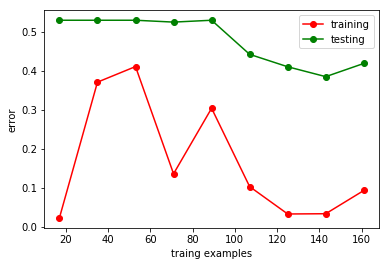

0.8
对分数小于3的数据，用朴素贝叶斯方法分类，模型精度上限大约为 0.614486215539


In [29]:
# Determine the size of training set

# model = sklearn.svm.SVC()
g_train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.9]
train_sizes,train_score,test_score = model_selection.learning_curve(b_model, b_train_x, b_train_y,train_sizes=g_train_sizes,cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')

plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()
print(g_train_sizes[np.argmin(test_error)])
print("对分数小于3的数据，用朴素贝叶斯方法分类，模型精度上限大约为 "+str(1-np.min(test_error)))

In [30]:
g_train_x, g_test_x, g_train_y, g_test_y = train_test_split(data_good.cutted_comment, data_good.star, test_size = 0.8, random_state = 4)
g_vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words = new_stopwords.extend(sim_12))
g_train_x = g_vectorizer.fit_transform(g_train_x)
g_model = sklearn.naive_bayes.MultinomialNB(4).fit(g_train_x, g_train_y)
g_pred_y = g_model.predict(g_vectorizer.transform(g_test_x))
print(sklearn.metrics.classification_report(g_pred_y, g_test_y))

             precision    recall  f1-score   support

          4       0.97      0.51      0.67       745
          5       0.10      0.76      0.18        55

avg / total       0.91      0.53      0.64       800



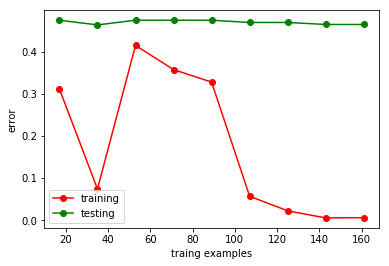

0.2
对分数大于3的数据，用朴素贝叶斯方法分类，模型精度上限大约为 0.536090225564


In [31]:
# Determine the size of training set

# model = sklearn.svm.SVC()
g_train_sizes = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8, 0.9]
train_sizes,train_score,test_score = model_selection.learning_curve(g_model, g_train_x, g_train_y,train_sizes=g_train_sizes,cv=10,scoring='accuracy')
train_error =  1- np.mean(train_score,axis=1)
test_error = 1- np.mean(test_score,axis=1)
plt.plot(train_sizes,train_error,'o-',color = 'r',label = 'training')
plt.plot(train_sizes,test_error,'o-',color = 'g',label = 'testing')

plt.legend(loc='best')
plt.xlabel('traing examples')
plt.ylabel('error')
plt.show()
print(g_train_sizes[np.argmin(test_error)])
print("对分数大于3的数据，用朴素贝叶斯方法分类，模型精度上限大约为 "+str(1-np.min(test_error)))

## Try to combine three two-classification

Now we use three classifications, all the three classifications directly work on the whole test set.


In [32]:
# Data split
import numpy as np
train_x, f_test_x, train_y,  test_y = train_test_split(df.cutted_comment.values, df[['good', 'star']], test_size = 0.4, random_state = 32)
# Vecotrize
new_stopwords = stopwords
vectorizer = TfidfVectorizer(ngram_range=(1,2), stop_words = new_stopwords.extend(df_count_once), lowercase = False)
train_x = vectorizer.fit_transform(train_x)
test_x = vectorizer.transform(f_test_x)

# 区分12 还是 45 的数据, train_first_y, test_first_y
train_f_y, test_f_y = train_y.good.values, test_y.good.values

# 在区分好12 45 后区分具体评分的数据 train_good/bad_x, train_good/bad_y
new_stopwords = stopwords
new_stopwords.extend(df_count_20) 
new_stopwords.extend(df_count_g_50)
vectorizer_b = TfidfVectorizer(ngram_range=(1,2), stop_words = new_stopwords.extend(sim_12), lowercase=False, max_features=600)
vectorizer_g = TfidfVectorizer(ngram_range=(1,2), stop_words = new_stopwords.extend(sim_45), lowercase=False, max_features=700)

train_g_x = vectorizer_g.fit_transform(np.array([train_x[i] for i in range(train_x.shape[0]) if train_y.good.values[i] == 1], dtype=str))
train_b_x = vectorizer_b.fit_transform(np.array([train_x[i] for i in range(train_x.shape[0]) if train_y.good.values[i] == 0], dtype=str))
train_g_y, train_b_y = [train_y['star'].values[i] for i in range(len(train_y)) if train_y.good.values[i] == 1], [train_y['star'].values[i] for i in range(len(train_y)) if train_y.good.values[i] == 0]


# normalizer = sklearn.preprocessing.Normalizer().fit(train_x)

In [33]:
# Model Training
# model_f = sklearn.neighbors.KNeighborsClassifier()
model_f = sklearn.naive_bayes.MultinomialNB(alpha = 1.9)
model_f.fit(train_x, train_f_y)
#
# model_g = sklearn.naive_bayes.MultinomialNB(alpha = 1.5)
model_g = sklearn.svm.LinearSVC(C=50)
# model_g = sklearn.neighbors.KNeighborsClassifier()
# model_g = sklearn.linear_model.LogisticRegression(C=10)
# sample_weight_g = [(lambda x: 1 if x == 4 else 1.008885)(x) for x in train_g_y]
model_g.fit(train_g_x, train_g_y)


# model_b = sklearn.naive_bayes.MultinomialNB(alpha = 0.6)
# model_b = sklearn.naive_bayes.GaussianNB()
model_b = sklearn.svm.LinearSVC(C = 50)
# model_b = sklearn.linear_model.LogisticRegression()
# model_b = sklearn.neighbors.KNeighborsClassifier(weights='distance', n_neighbors=7)
model_b.fit(train_b_x, np.array(train_b_y))


LinearSVC(C=50, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [34]:
# Predict on the testing set   
pred_y = model_f.predict(test_x)
print(sklearn.metrics.classification_report(test_y.good.values, pred_y, target_names=['1or2', '4or5']))
print("第一次二分类 Number of mislabeled points out of a total %d points : %d" % ((len(test_y.good.values),(test_y.good.values != pred_y).sum())))

test_x_g, test_x_b = [test_x[i] for i in range(len(pred_y)) if pred_y[i] == 1], [test_x[i] for i in range(len(pred_y)) if pred_y[i] == 0]

# pred_y_g, pred_y_b = model_g.predict(test_x), model_b.predict(test_x) 
pred_y_g = model_g.predict(vectorizer_g.transform([f_test_x[i] for i in range(len(test_y)) if pred_y[i] == 1]))
pred_y_b = model_b.predict(vectorizer_b.transform([f_test_x[i] for i in range(len(test_y)) if pred_y[i] == 0]))


# Conclude the prediction result
pred_result = [] 
count_g, count_b = 0,0
for i in range(len(pred_y)): # Merge
    if pred_y[i] == 0:
        pred_result.append(pred_y_b[count_b])
        count_b+=1
    else:
        pred_result.append(pred_y_g[count_g])
        count_g+=1
print(sklearn.metrics.classification_report(test_y.star.values, pred_result))
print("Number of mislabeled points out of a total %d points : %d" % ((len(test_y.star.values),(test_y.star.values != pred_result).sum())))
    
# Confusion matrix
from sklearn.metrics import confusion_matrix
labels = [1,2,4,5]
conf_mat = confusion_matrix(test_y.star.values, pred_result, labels = labels) 
conf_mat

             precision    recall  f1-score   support

       1or2       0.83      0.86      0.84       390
       4or5       0.86      0.84      0.85       410

avg / total       0.85      0.85      0.85       800

第一次二分类 Number of mislabeled points out of a total 800 points : 123
             precision    recall  f1-score   support

          1       0.45      0.90      0.60       199
          2       0.00      0.00      0.00       191
          4       0.00      0.00      0.00       194
          5       0.48      0.89      0.62       216

avg / total       0.24      0.46      0.32       800

Number of mislabeled points out of a total 800 points : 429


C:\Users\Claude\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


array([[179,   0,   0,  20],
       [155,   0,   0,  36],
       [ 43,   0,   0, 151],
       [ 24,   0,   0, 192]])

In [35]:
print(sklearn.metrics.classification_report(model_b.predict(train_b_x), train_b_y))
print("Number of mislabeled points out of a total %d points : %d" % ((len(test_y.star.values),(test_y.star.values != pred_result).sum())))
    
# Confusion matrix
from sklearn.metrics import confusion_matrix
labels = [1,2]
conf_mat = confusion_matrix(model_b.predict(train_b_x), train_b_y, labels = labels) 
conf_mat

             precision    recall  f1-score   support

          1       0.99      0.97      0.98       306
          2       0.97      0.99      0.98       304

avg / total       0.98      0.98      0.98       610

Number of mislabeled points out of a total 800 points : 429


array([[297,   9],
       [  4, 300]])

In [42]:
import gensim